In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from metpy.plots import USCOUNTIES
import geopandas
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
from datetime import datetime, date
from dateutil import tz
import glob
from shapely.geometry import shape, Polygon
from decimal import Decimal
import json

In [2]:
geo = {"id": "https://api.weather.gov/alerts/NWS-IDP-PROD-4788070",
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [
                            -81.950000000000003,
                            28.960000000000001
                        ],
                        [
                            -81.659999999999997,
                            28.960000000000001
                        ],
                        [
                            -81.640000000000001,
                            29.27
                        ],
                        [
                            -81.609999999999999,
                            29.199999999999999
                        ],
                        [
                            -81.519999999999996,
                            29.169999999999998
                        ],
                        [
                            -81.5,
                            29.099999999999998
                        ],
                        [
                            -81.4599999,
                            29.089999999999996
                        ],
                        [
                            -81.439999999999998,
                            29.049999999999997
                        ],
                        [
                            -81.420000000000002,
                            28.739999999999998
                        ],
                        [
                            -81.4599999,
                            28.709999999999997
                        ],
                        [
                            -81.4599999,
                            28.639999999999997
                        ],
                        [
                            -81.409999999999997,
                            28.639999999999997
                        ],
                        [
                            -81.379999999999995,
                            28.089999999999996
                        ],
                        [
                            -81.449999999999989,
                            28.089999999999996
                        ],
                        [
                            -81.459999899999985,
                            28.139999999999997
                        ],
                        [
                            -81.519999999999982,
                            28.139999999999997
                        ],
                        [
                            -81.559999999999988,
                            28.259999999999998
                        ],
                        [
                            -81.659999999999982,
                            28.259999999999998
                        ],
                        [
                            -81.659999999999982,
                            28.349999999999998
                        ],
                        [
                            -81.959999899999985,
                            28.349999999999998
                        ],
                        [
                            -81.950000000000003,
                            28.960000000000001
                        ]
                    ]
                ]
            },
            "properties": {
                "@id": "https://api.weather.gov/alerts/NWS-IDP-PROD-4788070",
                "@type": "wx:Alert",
                "id": "NWS-IDP-PROD-4788070",
                "areaDesc": "Orange; Osceola; Southern Lake County; Northern Lake County",
                "geocode": {
                    "UGC": [
                        "FLZ045",
                        "FLZ053",
                        "FLZ144",
                        "FLZ044"
                    ],
                    "SAME": [
                        "012095",
                        "012097",
                        "012069"
                    ]
                },
                "affectedZones": [
                    "https://api.weather.gov/zones/forecast/FLZ045",
                    "https://api.weather.gov/zones/forecast/FLZ053",
                    "https://api.weather.gov/zones/forecast/FLZ144",
                    "https://api.weather.gov/zones/forecast/FLZ044"
                ],
                "references": [],
                "sent": "2021-02-13T08:58:00-05:00",
                "effective": "2021-02-13T08:58:00-05:00",
                "onset": "2021-02-13T08:58:00-05:00",
                "expires": "2021-02-13T10:00:00-05:00",
                "ends": None,
                "status": "Actual",
                "messageType": "Alert",
                "category": "Met",
                "severity": "Moderate",
                "certainty": "Observed",
                "urgency": "Expected",
                "event": "Special Weather Statement",
                "sender": "w-nws.webmaster@noaa.gov",
                "senderName": "NWS Melbourne FL",
                "headline": "Special Weather Statement issued February 13 at 8:58AM EST by NWS Melbourne FL",
                "description": "At 855 AM EST, Doppler radar was tracking a broken line of strong\nlightning storms along a line extending from The Villages to near\nLakeland. Movement was east at 40 mph.\n\nWinds in excess of 40 mph and briefly very heavy rain, and\noccasional lightning will be possible with some of the stronger\nstorms.\n\nLocations impacted include...\nLeesburg, Kissimmee, Apopka, Ocoee and Winter Garden.",
                "instruction": None,
                "response": "Execute",
                "parameters": {
                    "eventMotionDescription": [
                        "2021-02-13T08:55:00.000-05:00...storm...249DEG...46KT...28.82,-81.95 28.07,-82.01"
                    ],
                    "NWSheadline": [
                        "SIGNIFICANT WEATHER ADVISORY FOR LAKE...WESTERN ORANGE AND NORTHWESTERN OSCEOLA COUNTIES UNTIL 1000 AM EST"
                    ],
                    "EAS-ORG": [
                        "WXR"
                    ],
                    "PIL": [
                        "MLBSPSMLB"
                    ],
                    "BLOCKCHANNEL": [
                        "CMAS",
                        "EAS",
                        "NWEM"
                    ]
                }
            }
        }

In [5]:
ddb_data = json.loads(json.dumps(geo), parse_float=Decimal)
ddb_data

{'id': 'https://api.weather.gov/alerts/NWS-IDP-PROD-4788070',
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[Decimal('-81.95'), Decimal('28.96')],
    [Decimal('-81.66'), Decimal('28.96')],
    [Decimal('-81.64'), Decimal('29.27')],
    [Decimal('-81.61'), Decimal('29.2')],
    [Decimal('-81.52'), Decimal('29.169999999999998')],
    [Decimal('-81.5'), Decimal('29.099999999999998')],
    [Decimal('-81.4599999'), Decimal('29.089999999999996')],
    [Decimal('-81.44'), Decimal('29.049999999999997')],
    [Decimal('-81.42'), Decimal('28.74')],
    [Decimal('-81.4599999'), Decimal('28.709999999999997')],
    [Decimal('-81.4599999'), Decimal('28.639999999999997')],
    [Decimal('-81.41'), Decimal('28.639999999999997')],
    [Decimal('-81.38'), Decimal('28.089999999999996')],
    [Decimal('-81.44999999999999'), Decimal('28.089999999999996')],
    [Decimal('-81.45999989999999'), Decimal('28.139999999999997')],
    [Decimal('-81.51999999999998'), Decimal('28.1399999999

In [229]:
# for d in geo:
#     geo['geometry'] = shape(geo['geometry'])

geo['geometry'] = shape(geo['geometry'])
gdf = geopandas.GeoDataFrame(geo).set_geometry('geometry')
west_bound, south_bound, east_bound, north_bound = gdf['geometry'][0].bounds

poly = gdf['geometry']
alert_type = gdf['properties'].loc['event']

In [236]:
# Set colors
warning_cmap = {'Flood Advisory': '#00FF7F',
                'Flash Flood Warning': '#8B0000',
                'Flood Warning': '#00FF00',
                'Severe Thunderstorm Warning': '#FFA500',
                'Special Weather Statement': '#FFE4B5',
                'Tornado Warning': '#FF0000'}

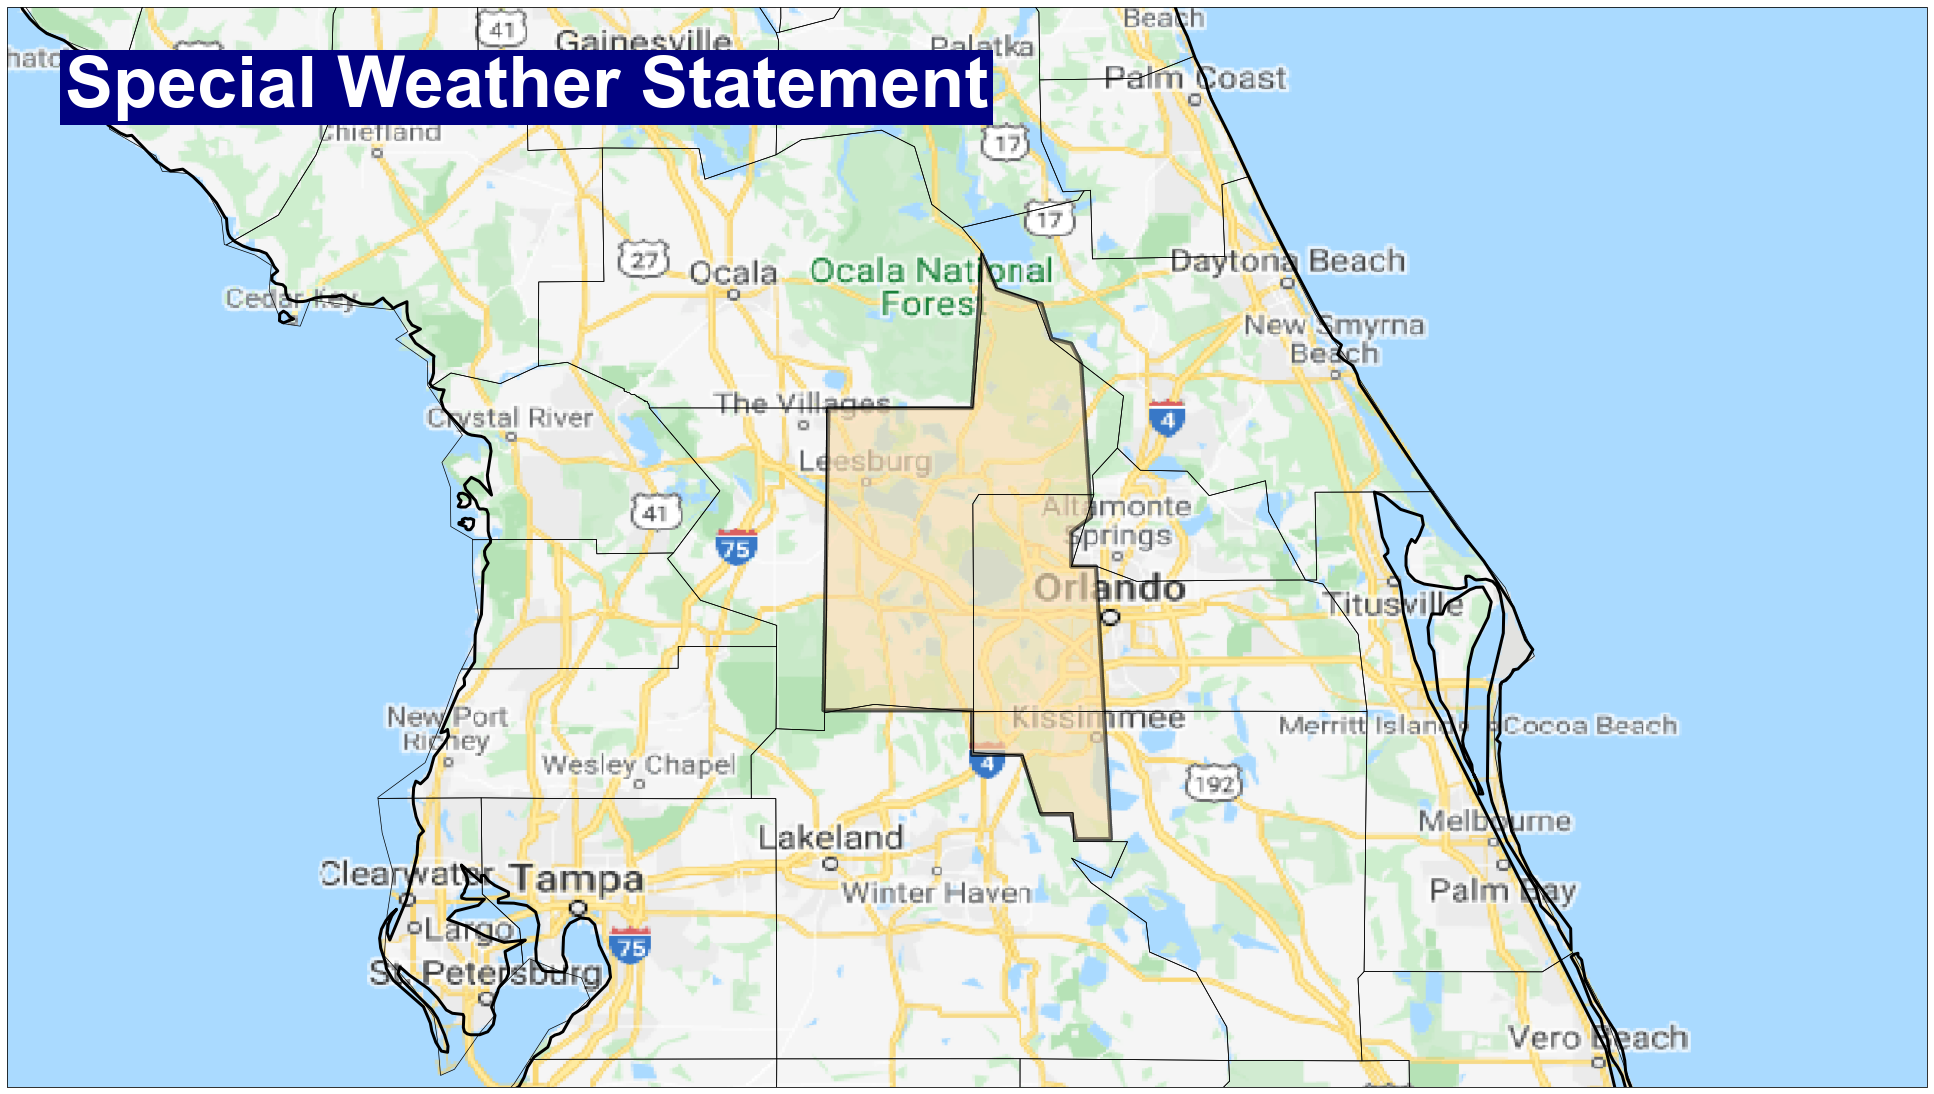

In [238]:
#url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/{z}/{y}/{x}.jpg'
#image = GoogleTiles(url=url)

image = GoogleTiles()
#image = OSM()
#image = Stamen(style='toner')

data_crs = ccrs.PlateCarree()
# Setup matplotlib figure
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)

ax.add_image(image, 8)
ax.set_extent([west_bound - 0.5, east_bound + 0.5, south_bound - 0.5, north_bound + 0.5], data_crs)
ax.set_adjustable('datalim')

# Setup borders (states, countries, coastlines, etc)
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black', zorder=5, linewidth=0.7)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=3, zorder=5)

for key in warning_cmap.keys():
    if key == alert_type:
        ax.add_geometries(poly, crs=data_crs, facecolor=warning_cmap[key],
                          edgecolor='black', linewidth=4, zorder=1, alpha=0.04)

# Set title
ax.set_title(f'{alert_type}', loc='left', 
             ha='left', va='top', fontsize=72, color='white', 
             fontweight='bold', fontname='Arial', y=0.95, x=0.03, zorder=11,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))

plt.savefig('test.png', dpi=72)